### **Setup Interpreter**

Some test code that shows how to use **mllibs**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from mllibs.nlpm import nlpm
from mllibs.nlpi import nlpi
from mllibs.eda.meda_scplot import eda_scplot
from mllibs.eda.meda_pplot import eda_pplot
from mllibs.eda.meda_splot import eda_splot
from mllibs.nlp.mencoder import encoder
from mllibs.nlp.membedding import embedding
from mllibs.stats.mstats_tests import stats_tests
from mllibs.stats.mstats_plot import stats_plot
from mllibs.libop.mlibop import libop_general
from mllibs.pd.mpd_df import pd_df
from mllibs.pd.mpd_talktodata import pd_talktodata
from mllibs.signal.mfourier_all import fourier_all
# from mllibs.mdsplit import make_fold
# from mllibs.moutliers import data_outliers
# from mllibs.musldimred import make_dimred 

# nlpi.activate = False
# link all modules into one collection|
c = nlpm()
c.load([
         eda_splot(),     # [eda] standard seaborn plots
         eda_scplot(),    # [eda] seaborn column plots
         encoder(),       # [nlp] standard encoding methods 
         embedding(),     # [nlp] embedding methods
         eda_pplot(),     # [eda] plotly express visualisations
         stats_tests(),   # [stats] statistical tests for list data
         stats_plot(),    # [stats] ploty and compare statistical distributions
         libop_general(), # [library] mllibs related functionality
         pd_df(),         # [eda] simple pandas operations
         pd_talktodata(), # [eda] pandas data exploration 
         fourier_all()    # [signal] fast fourier transformation related
        ])

# c.setup(type='load_bert')
c.setup(type='mlloop')
i = nlpi(c)
i.load_sample_data()
i.store_ac('penguins','selected_columns',['bill_length_mm','bill_depth_mm'])

# ldata = nlpi.data['iris']['data']
# train,test = train_test_split(ldata)
# interpreter.store_data({'train':train,'test':test})

# store data
# sample1 = list(np.random.normal(scale=1, size=1000))
# sample2 = list(np.random.normal(scale=1, size=1000))
# interpreter.store_data({'distribution_A':sample1,'distribution_B':sample2})

reviews = pd.read_csv('https://raw.githubusercontent.com/shtrausslearning/Data-Science-Portfolio/main/sources/customer_reviews.csv',sep=',')
i.store_data({'reviews_data':reviews})

/Users/mac/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



[note] initialising nlpm, please load modules using .load(list)
[note] loading modules ...
[note] making module summary labels...
[note] training  [gt] [RandomForestClassifier()] [accuracy,0.998]
[note] [ner_identifier] model trained
[note] models trained!


In [2]:
# i.token_info

In [3]:
# collection.ner_identifier['tfidf'].vocabulary_
# nlpi.memory_output[-1]['ohe_data']
# i['show a preview of data titanic']
nlpi.silent = False
# i["show me the column distribution of island and sex in penguins"]
# interpreter['show the dataframe information for stocks']
# interpreter['describe the dataframe stocks']

# i['show me what data is available']
# i['show the missing data in terms of percentage in titanic']
i['show how much data is missing in titanic']
# i['in dataset titanic show the percentage of data missing']
# i['what is the percentage of missing rows in titanic']
# i['how many rows are missing in data titanic, in terms of percentage']
# i['does the data titanic contain missing data']
# i["using data penguins, create a plotly scatter plot using parameters x body_mass_g y bill_depth_mm and hue island set mew 1.5"]
# i['show the distribution of column deck in data titanic']


##################################################################

[note] extracting parameters from input request!

[note] input request:
show how much data is missing in titanic

[note] no ner parameter filtration and extraction was made

[note] filtered request:
show how much is missing

##################################################################

[note] found relevant global task [dfna_all] w/ [0.6] certainty!
869 rows in total have missing data
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
[note] I've also stored the missing rows!


In [5]:
# self.token_info['data'].fillna(-1).astype('int')
i.token_info

,token,index_id,type,ner_tags,data,dtype,column,ttype,ttype_storage,token_arg,token_argv,vocab,keep_token
0,what,0,uni,O,NaN,NaN,NaN,str,what,False,0,True,False
1,is,1,uni,O,NaN,NaN,NaN,str,is,False,0,True,False
2,the,2,uni,O,NaN,NaN,NaN,str,the,False,0,True,False
3,percentage,3,uni,O,NaN,NaN,NaN,str,percentage,False,0,True,False
4,of,4,uni,O,NaN,NaN,NaN,str,of,False,0,True,False
5,missing,5,uni,O,NaN,NaN,NaN,str,missing,False,0,True,False
6,rows,6,uni,O,NaN,NaN,NaN,str,rows,False,0,True,False
7,in,7,uni,B-SOURCE,NaN,NaN,NaN,str,in,False,0,True,True
8,titanic,8,uni,O,2.0,pd.DataFrame,NaN,str,titanic,False,0,False,False


In [6]:
# import torch
# from sklearn import preprocessing

# model = collection.model['gtb']
# tokeniser = collection.tokeniser['gtb']
# le = preprocessing.LabelEncoder()
# df = collection.corpus_gt
# targets = le.fit_transform(df['task'])

# def inference(text,tokeniser,model):

#     # Tokenize the input text
#     inputs = tokeniser(input_text, 
#                        padding=True, 
#                        truncation=True, 
#                        return_tensors='pt')

#     # Perform inference using the model
#     with torch.no_grad():
#         outputs = model(**inputs)
#         logits = outputs.logits

#     # Get the predicted label
#     predicted_label = torch.argmax(logits, dim=1).item()

#     # Print the predicted label
#     print(f"The predicted label for the input text is: {le.classes_[predicted_label]}")
    
# # input_text = "I'd like you to create a seaborn scatterplot" # 61
# # input_text = "I want to plot a figure using the seaborn scatter plot" # 61
# input_text = "create a plotly scatter plot visualisation x: bill_depth_mm y: flipper_length_mm hue: sex col: sex using penguins"
# input_text = "add column A from data A to data B"
# input_text = "add column A from data A to data B"

# inference(input_text,tokeniser,model)

In [4]:
# import statsmodels.api as sm
# import plotly.graph_objects as go

# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# import statsmodels.api as sm
# import statsmodels.graphics.tsaplots as smt
# sns.set(style='whitegrid')

# def tsplot(y, lags=None, figsize=(10, 5), style='bmh'):
#     if not isinstance(y, pd.Series):
#         y = pd.Series(y)

#     fig, axes = plt.subplots(2, 2, figsize=figsize)
#     ts_ax = axes[0, 0]
#     acf_ax = axes[1, 0]
#     pacf_ax = axes[1, 1]

#     sns.lineplot(data=y, ax=ts_ax)
#     ts_ax.set_title('Time series analysis')
#     smt.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
#     smt.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)

#     pval = sm.tsa.stattools.adfuller(y)[1]
#     print(f"Dickey-Fuller criterion: p={pval}")
#     if p_value <= 0.05:
#         print("Reject the null hypothesis")
#         print("""
#               The time series data is likely to be non-stationary and may require
#               further processing or differencing to make it suitable for time series analysis.
#                """)
#     else:
#             print("Fail to reject the null hypothesis")
#     plt.tight_layout()
#     plt.show()

# tsplot(df['passengers'])

In [5]:
nlpi.silent = False

# interpreter['show the dataframe information for stocks']
# interpreter['describe the dataframe stocks']
# i['show me what data is available']
# i['show the missing data in terms of percentage in titanic']
# i['show how much data is missing in titanic']
# i['show how much data is missing in titanic']
# i['show the percentage of data missing in titanic']
# i['what is ther percentage of missing rows in titanic']
# i['how many rows are missing in data titanic, in terms of percentage']
# i['does the data titanic contain missing data']
i['show a preview of data titanic']

[note] one source token format
[note] no parameters to extract (possible NER miss)

[note] NER used to clean input text!
[input]
show preview of data titanic
[after]
show preview of data 

[note] found relevant global task [df_preview] w/ [0.89] certainty!
[note] one data source token has been set!


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
# i.token_info
# i.glr()['data']

In [10]:
# interpreter['generate one hot encoding of column sex island using penguins']

# store column names for a particular dataset
# interpreter.store_ac('penguins','ohe_columns',['sex','island'])

# interpreter['generate one hot encoding of column {ohe_columns} using penguins']
# interpreter['generate one hot encoding of columns island in data penguins']
# interpreter['please generate the fft for column passengers in flights']
# interpreter['please generate the fft for column GOOG in stocks']
# interpreter['please generate the fft of columns GOOG AAPL in stocks']

In [2]:
# i['dataframe preview of titanic']
i['show the distribution of column deck in data titanic']


###########################################################

[note] extracting parameters from input request!

[note] input request:
show the distribution of column deck in data titanic

[note] no ner parameter filtration and extraction was made

[note] filtered request:
show the distribution of column

###########################################################

[note] found relevant global task [dfcolumn_distr] w/ [0.54] certainty!


deck
NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: count, dtype: int64

In [4]:
# ls = i.data['titanic']['data']

### **Manually Call Active Functions**

In [17]:
# '''

# Manually call functions

# '''

# module_args = {}
# module_args['data'] = interpreter.data['reviews']['data']
# module_args['pred_task'] ='count_vectoriser'
# module_args['column'] = 'reviews'
# module_args['columns'] = None
# module_args['col'] = None
# module_args['ngram_range'] = None
# module_args['min_df'] = None
# module_args['max_df'] = None
# module_args['subset'] = ['reviews']

# interpreter.miter('encoder',module_args)
# interpreter.memory_output[-1]['data']

'\n\nManually call functions\n\n'

In [18]:
# from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
# from mllibs.dict_helper import sfp

# '''

# Manually call functions

# '''

# reviews = pd.read_csv('https://raw.githubusercontent.com/shtrausslearning/Data-Science-Portfolio/main/sources/customer_reviews.csv',sep=',')
# interpreter.store_data({'reviews':reviews})

# module_args = {}
# module_args['data'] = interpreter.data['reviews']['data']
# module_args['pred_task'] ='count_vectoriser'
# module_args['column'] = 'reviews'
# module_args['columns'] = None
# module_args['col'] = None
# module_args['ngram_range'] = None
# module_args['min_df'] = None
# module_args['max_df'] = None
# module_args['subset'] = ['reviews']

# def cv(args:dict):
                
#     # preset value dictionary
    
#     pre = {'ngram_range':(1,1),'min_df':1,'max_df':1.0}

#     if(args['subset'] != None):
    
#         vectoriser = CountVectorizer(ngram_range=sfp(args,pre,'ngram_range'),
#                                     min_df=sfp(args,pre,'min_df'),
#                                     max_df=sfp(args,pre,'max_df'))

#         print(args['subset'])
                
#         vectors = vectoriser.fit_transform(args['data'][args['subset'][0]])        
#         df_matrix = pd.DataFrame(vectors.todense(),
#                                     columns=vectoriser.get_feature_names_out())

#         display(df_matrix)

# cv(module_args)

'\n\nManually call functions\n\n'

In [20]:
interpreter.module_args.keys()

task = interpreter.module_args['pred_task']
input_format_str = interpreter.task_info.loc[task,'input_format']

In [17]:
interpreter.task_info['input_format'].value_counts()

input_format
pd.DataFrame                 39
list                         13
list,list                    10
None                          2
pd.DataFrame,pd.DataFrame     2
Name: count, dtype: int64

In [3]:
i.reset_session()

nlpi.silent = False
request = "create a bag of words model for text column reviews using reviews_data define ngram_range (1,2)"
i[request]


###########################################################

[note] extracting parameters from input request!

[note] input request:
create bag of words model for text column reviews using
reviews_data define ngram_range 1 2


[note] filtered request:
create bag of words model for text column

###########################################################

[note] found relevant global task [count_vectoriser] w/ [0.9] certainty!
[note] one data source token has been set!
['reviews']


In [5]:
# interpreter.glr()['vectoriser'].vocabulary_
# i.glr()['data']
# interpreter.task_name
# interpreter.token_info
# i.module_args['ngram_range']

,00,00 am,00 departure,00 email,00 flight,00 increase,00 is,00 midday,00 not,00 plus,...,zurich fly,zurich on,zurich time,zurich to,zurich via,zurich was,zusammenschluss,zusammenschluss geflogen,über,über unser
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# interpreter.memory_name
# pd.DataFrame(interpreter.memory_stack).T
# interpreter.glr()
# interpreter.memory_output[-1]['data']

In [6]:
# print(interpreter.module_args['columns'])
# print(interpreter.module_args['col'])
# print(interpreter.module_args['column'])

In [5]:
# interpreter.module_args['columns']
i.token_info
# collection.ner_identifier['y_pred']

,token,index_id,type,ner_tags,data,dtype,column,ttype,ttype_storage,token_arg,token_argv,vocab,keep_token
0,create,0,uni,O,NaN,NaN,NaN,str,create,False,0,True,False
1,bag,1,uni,O,NaN,NaN,NaN,str,bag,False,0,True,False
2,of,2,uni,O,NaN,NaN,NaN,str,of,False,0,True,False
3,words,3,uni,O,NaN,NaN,NaN,str,words,False,0,True,False
4,model,4,uni,O,NaN,NaN,NaN,str,model,False,0,True,False
5,for,5,uni,O,NaN,NaN,NaN,str,for,False,0,True,False
6,text,6,uni,O,NaN,NaN,NaN,str,text,False,0,True,False
7,column,7,uni,O,NaN,NaN,NaN,str,column,True,0,True,False
8,reviews,8,uni,O,NaN,NaN,reviews_data,str,reviews,False,True,False,False
9,using,9,uni,B-SOURCE,NaN,NaN,NaN,str,using,False,0,True,False


In [6]:
def check_list_in_col(df:pd.DataFrame,lst:list):

    # Get the column names of the DataFrame
    df_column_names = df.columns.tolist()
    
    # Check if all items in column_names_list are present in df_column_names
    if all(column in df_column_names for column in lst):
        return True
    else:
        return False

df = interpreter.data['flights']['data']
cols = ['passengers']
check_list_in_col(df,cols)

True

In [5]:
# '''

# mllibs related queries

# '''

# interpreter['which data is available to me']
# interpreter['show the dataframe information for data flights']

In [6]:
# import plotly.express as px

# df = px.data.stocks()
# display(df.head())

# df = px.data.stocks()

# '''

# Check if dataframe contains the list of column names provided

# '''

# def check_list_in_col(df:pd.DataFrame,lst:list):

#     # Get the column names of the DataFrame
#     df_column_names = df.columns.tolist()
    
#     # Check if all items in column_names_list are present in df_column_names
#     if all(column in df_column_names for column in lst):
#         return True
#     else:
#         return False


In [115]:
# funds = pd.read_csv('https://raw.githubusercontent.com/shtrausslearning/Data-Science-Portfolio/main/sources/funds_data.csv',delimiter=';')
# funds.head()
# interpreter.store_data({'funds':train})

import pandas as pd

'''

Convert list to:

        - list 
        - dataframe
        - dictionary

'''

def convert_list(data:list,output_type:str,name:str=None):
    
    if output_type == 'series':
        if(name == None):
            return pd.Series(data,name='list')
        else:
            return pd.Series(data,name=f'{list}')
    elif output_type == 'dataframe':
        if(name == None):
            return pd.DataFrame(data,columns=[f'{name}'])
        else:
            return pd.DataFrame(data,columns=['list'])
    elif output_type == 'dict':
        if(name == None):
            return {'list':data}
        else:
            return {f'{name}':data}
    else:
        return "Invalid output type"


def convert_series(data:pd.Series,output_type:str,name:str=None):

    # list
    if(output_type == 'list_data'):
        return data.tolist()
    elif(output_type == 'list_index'):
        return list(data.index)

    # dataframe
    elif(output_type == 'dataframe'):
        if(name == None):
            return data.to_frame()
        else:
            ldf = data.to_frame()
            ldf.columns = [f'{name}']
            return ldf
            
    # dictionary
    elif(output_type == 'dict_index'):
        return data.to_dict()
    elif(output_type == 'dict_rindex'):
        return {v: k for k, v in data.to_dict().items()}
    elif(output_type == 'dict_name'):
        if(name == None):
            return {data.name:list(data.values)}
        else:
            return {f'{name}':list(data.values)}


# Example usage
input_series = pd.Series([1, 2, 3, 4, 5],name='column',index=['a','b','c','d','e'])
# convert_list(input_list, 'series')
# convert_list(input_list, 'dataframe')
# convert_list(input_list, 'dictionary','data')


convert_series(input_series,'dict_name')

{'column': [1, 2, 3, 4, 5]}

In [4]:
# '''

# pd_df library tests

# '''

interpreter['concatenate two dataframes train test axis: 0 join: inner']

The predicted label for the input text is: dfconcat


In [3]:
# '''

# mstats_tests library tests

# '''

# import numpy as np

# nlpi.activate = True
# nlpi.silent = True

# # store data
# sample1 = list(np.random.normal(loc=1,scale=1, size=1000))
# sample2 = list(np.random.normal(loc=1,scale=1, size=1000))

# interpreter.store_data({'distribution_A':sample1,
#                         'distribution_B':sample2})

# # req = "two sample ttest using: distribution_B distribution_A"
# # req = "comapare histograms of samples distribution_B distribution_A"
# # req = "compare the histograms of two samples distribution_B distribution_A nbins 50"

# # interpreter[req]

# # req = "compare kde plot of two samples distribution_B distribution_A"

# # interpreter[req]

# # req = "compare the histograms of two samples distribution_B distribution_A nbins 50"

# # interpreter[req]

# # req = "create bootstrap samples for two dataset distribution_B distribution_A nbins: 50"

# # interpreter[req]


# # req = "create wild bootstrap samples for two dataset distribution_B distribution_A nbins: 50"

# # interpreter[req]

# sample1 = list(np.random.exponential(scale=1, size=1000))
# sample2 = list(np.random.exponential(scale=1, size=1000))

# interpreter.store_data({'distribution_A':sample1,
#                         'distribution_B':sample2})

# req = "create wild bootstrap samples for two dataset distribution_B distribution_A nbins: 50"

# interpreter[req]


In [ ]:
"for data1 use parameters A, B and C and for data2 use parameters A, B, C|

In [2]:
'''

mpd_talktodata examples

'''

nlpi.silent = False
# interpreter['show the distribution of column island in penguins'] # ok
# interpreter['show the all the missing data in penguins'] # ok
# interpreter['show missing data in column sex in data penguins'] # ok
# interpreter['show missing data in all columns in penguins']
# interpreter['show the dataframe size of penguins']
# interpreter['show the unique values in column island in data penguins']

In [6]:
# interpreter.token_info
# import sklearn
# sklearn.feature_extraction.text.ENGLISH_STOP_WORDS

In [4]:
# from itertools import groupby

# ls = interpreter.token_info.copy()
# my_list = list(ls['vocab'])
# print(my_list)
  
# # group together values      
# result = [list(group) for key, group in groupby(my_list)]
# print(result)

# # group together indicies of values
# result = [[i for i, _ in group] for key, group in groupby(enumerate(my_list), key=lambda x: x[1]) if key is True]
# print(result)

# longest_subset = max(result,key=len)
# longest_subset = set(longest_subset)
# print(longest_subset)

# # ner tags which are not O (eg. PARAM/SOURCE)
# notO = [ i for i,j in enumerate(list(ls['ner_tags'])) if j != 'O' ]
# notO_set = set(notO)

# # find overlap
# overlap_idx = longest_subset & notO_set

# ls['keep_token'] = False
# ls.loc[list(overlap_idx),'keep_token'] = True
# ls

[note] plot parameter updated!

###########################################################

[note] extracting parameters from input request!

[note] input request:
create plotly scatter plot x body_mass_g y {
selected_columns } using penguins set mec 1.5 mew 1.5

[note] storing active columns for [y] in module_args

[note] filtered request:
create plotly scatter plot using set

###########################################################

[note] found relevant global task [plscatter] w/ [0.87] certainty!
[note] one data source token has been set!


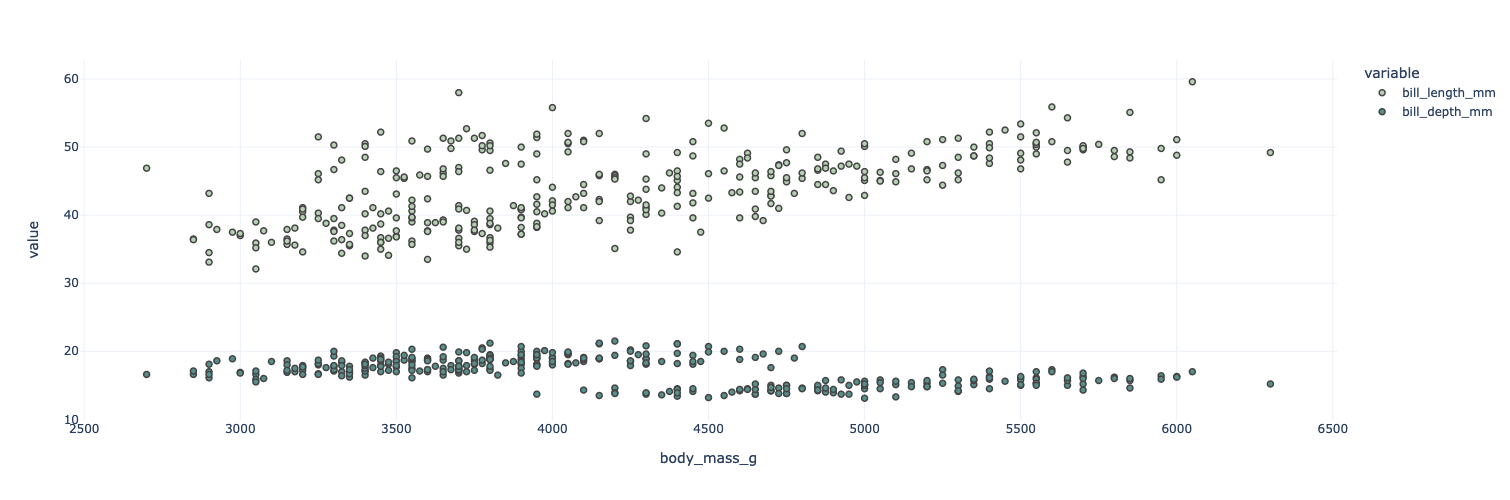

In [7]:
i.setpp({'figsize':[500,800],'template':'plotly_white','title':None})
nlpi.silent = False

# [0] using active columns

req = "create plotly scatter plot x: body_mass_g y: {selected_columns} using penguins set mec 1.5 and mew 1.5"
i[req]

# simple request one PARAM per column 
# req = "create plotly scatterplot x: bill_depth_mm y: flipper_length_mm hue: island using penguins"

# interpreter[req]

# [1] regular notation (multiple y) 

# req = "create plotly scatterplot x: body_mass_g y: bill_length_mm bill_depth_mm using penguins set parameters"
# interpreter[req]

# [1] regular notation (single y) 

# req = "mew: 1 create plotly scatterplot x: body_mass_g y: bill_depth_mm using penguins"
# req = "create plotly scatterplot x: body_mass_g y: bill_depth_mm hue: island col sex mew: 1.5 mec: black s: 7 marginal_x box marginal_y box using penguins"
# req = "create plotly boxplot x: island y: bill_depth_mm hue sex using penguins"

# [2] simple request one PARAM per column

# req = "create plotly count heatmap x: bill_depth_mm y: flipper_length_mm hue: sex col: sex using penguins"
# req = "using data penguins, create a plotly scatter plot using parameters x: body_mass_g y: bill_depth_mm and hue: island set mew 1.5"
# i[req]

In [5]:
# interpreter['show the distribution of column sex in data penguins']
# i.token_info
i.module_args['mec']
# nlpi.pp

1.5

In [7]:
# nlpi.silent = False
# interpreter['seaborn scatterplot using penguins x bill_length_mm y bill_depth_mm hue: island']

# interpreter.token_info
# interpreter.module_args['mew']

In [24]:
ls = nlpi.task_info
plotly_id = 'plotly' in ls.loc['plscatter','description']
seaborn_id = 'seaborn' in  ls.loc['plscatter','description']

AttributeError: type object 'nlpi' has no attribute 'task_info'

In [4]:
'''

Column Plots

'''

# interpreter.setpp
({'alpha':1.0,'fill':True,'mec':'k','mew':1.5,'stheme':'viridis','s':35})
interpreter['visualise column scatterplot for penguins x bill_length_mm hue sex']

[note] one source token format

[note] NER used to clean input text!
[input]
visualise column scatterplot for penguins x bill_length_mm hue sex
[after]
visualise column for 

[note] found relevant global task [col_box] w/ [0.27] certainty!
[note] one data source token has been set!


AttributeError: 'list' object has no attribute 'columns'

In [86]:
# interpreter['pca dimensionality reduction using data housing']
# interpreter.glr()['data']
# interpreter.store_data(interpreter.glr()['data'],'pca')

In [135]:
# # plot first two dimensions
# interpreter.setpp({'alpha':1.0,'fill':False,'mec':'k','mew':1,'s':25})
# interpreter['create seaborn scatter plot using data pca x:dim_0 y:dim_1']

In [87]:
# # interpreter.fl('usldimred')
# interpreter.fl()

In [3]:
# import pandas as pd

# # Example DataFrame
# df = pd.DataFrame({
#     'column1': ['2021-01-01', '2022-02-02', '2023-03-03'],
#     'column2': ['01/01/2021', '02/02/2022', '03/03/2023'],
#     'column3': ['2021-01-01', '2022-02-02', 'Not a date'],
#     'date_column': ['2021-01-01 12:34:56', '2022-02-02 01:23:45', '2023-03-03 23:59:59']
# })

# def find_datecolumns(df:pd.DataFrame):

#     # Check if each column is in a date format
#     lst_date_columns = []
#     for column in df.columns:
#         try:
#             pd.to_datetime(df[column])
#             lst_date_columns.append(column)
#         except:
#             pass

#     if(len(lst_date_columns) == 0):
#         return None
#     else:
#         return lst_date_columns

# columns = find_datecolumns(df)
# print(columns)

# def convert_datecolumns(df:pd.DataFrame):

#     # Check if each column is in a date format
#     for column in df.columns:
#         try:
#             pd.to_datetime(df[column])
#             df[column] = pd.to_datetime(df[column])
#         except:
#             pass

#     return df

# ldf = convert_datecolumns(df)
# print(ldf)

### Debugging

In [185]:
# collection.test('gt','create a boxplot')
# collection.predict_gtask('gt','create a column boxplot')

# eval("['A','B','C']")
# exec("x=['A','B','C']")

In [136]:
# '''

# Do some testing to make sure the corpus works well 

# '''

# # collection.dtest('eda_plot','create seaborn scatter plot')
# collection.dtest('gt','compare histograms of samples')

In [ ]:
# collection.test('gt','create a boxplot')
# collection.predict_gtask('gt','create a column boxplot')

In [137]:
# '''

# Seaborn Plots

# '''

# req = '''
# create seaborn relplot
# x: bill_length_mm 
# y: bill_depth_mm 
# hue: island
# kind: scatter
# using penguins
# '''

# interpreter.setpp({'fill':True,'alpha':1,'mew':1})
# interpreter[req]

# # interpreter['create seaborn boxplot using housing y AGE x RAD']
# # interpreter['create seaborn relplot x: bill_length_mm y: bill_depth_mm hue island col=island alpha=1.0 s:50 mew: 1 using penguins']
# # interpreter['create seaborn relplot x: bill_length_mm y: bill_depth_mm hue island using penguins']

In [140]:
# lst = [1,2,3,4,5,6]
# for i,j in zip(lst,lst[1:]):
#     print(i*j)

# eval("['A','B','C']")
# exec("x=['A','B','C']")

In [3]:
# # self.task_name
# 'plotly' in interpreter.task_info.loc['plscatter','description']
interpreter.data['stocks']

{'data':            date      GOOG      AAPL      AMZN        FB      NFLX      MSFT
 0    2018-01-01  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000
 1    2018-01-08  1.018172  1.011943  1.061881  0.959968  1.053526  1.015988
 2    2018-01-15  1.032008  1.019771  1.053240  0.970243  1.049860  1.020524
 3    2018-01-22  1.066783  0.980057  1.140676  1.016858  1.307681  1.066561
 4    2018-01-29  1.008773  0.917143  1.163374  1.018357  1.273537  1.040708
 ..          ...       ...       ...       ...       ...       ...       ...
 100  2019-12-02  1.216280  1.546914  1.425061  1.075997  1.463641  1.720717
 101  2019-12-09  1.222821  1.572286  1.432660  1.038855  1.421496  1.752239
 102  2019-12-16  1.224418  1.596800  1.453455  1.104094  1.604362  1.784896
 103  2019-12-23  1.226504  1.656000  1.521226  1.113728  1.567170  1.802472
 104  2019-12-30  1.213014  1.678000  1.503360  1.098475  1.540883  1.788185
 
 [105 rows x 7 columns],
 'subset': None,
 'splits': {},
 'splits_

In [5]:
# import pandas as pd

# cols = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
#        'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
#        'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
#        'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
#        'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
#        'fractal_dimension_se', 'radius_worst', 'texture_worst',
#        'perimeter_worst', 'area_worst', 'smoothness_worst',
#        'compactness_worst', 'concavity_worst', 'concave points_worst',
#        'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']

# df = pd.read_csv("https://raw.githubusercontent.com/akshaybahadur21/BreastCancer_Classification/master/breast_cancer/cancer_data.csv",
#                  names = cols)
# df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [10]:
from mllibs.list_helper import get_bracket_content
from itertools import groupby

'''



'''


def data_tokenfilter(tdf:pd.DataFrame):

    # identify source related index and remove them
    ls = tdf.copy()

    # number of data sources
    nsources = len(ls[~ls['data'].isna()])

    # either there are multiple or only a single one
    try:
        max_lendiff = int(np.max(ls[ls['dtype'].notna()]['index_id'].diff()))
    except:
        max_lendiff = 0

    # number of data sources > 0 to activate

    if(nsources > 0):

        # ONE SOURCE CASE
        
        if(max_lendiff == 0):

            # eg. in dataA

            if(nlpi.silent is False):
                print('[note] one source token format')

            # all index that needs to be removed
            lst_remove_idx = []
            
            # get the data index id
            p0 = list(ls[ls['dtype'].notna()]['index_id'])[0]
            lst_remove_idx.append(p0)

            ''' CHECKING PREVIOUS TOKENS '''

            # create window to check previous tokens
            pm1 = p0 - 1
            pm2 = p0 - 2

            # check if previous token belongs to SOURCE token
            try:
                source_test_pm1 = ls.loc[pm1,'ner_tags'] in ['B-SOURCE','I-SOURCE']
                source_test_pm2 = ls.loc[pm2,'ner_tags'] in ['B-SOURCE','I-SOURCE']
            except:
                source_test_pm1 = ls.loc[pm1,'ner_tags'] in ['B-SOURCE','I-SOURCE']
                source_test_pm2 = None

            if(source_test_pm2):
                lst_remove_idx.append(pm1) # remove punctuation token
                lst_remove_idx.append(pm2) # remove SOURCE token
            elif(source_test_pm1):
                lst_remove_idx.append(pm1) # remove SOURCE token
            else:
                pass # nothing needs to be removed

        elif(max_lendiff == 1):

            # eg. using dataA dataB

            if(nlpi.silent is False):
                print('[note] two sources tokens side by side format')
                
            # get data index id
            lst_remove_idx = list(ls[ls['dtype'].notna()]['index_id'])
            p0 = lst_remove_idx[0] # first index only

            ''' CHECKING PREVIOUS TOKENS '''

            # create window to check previous tokens
            pm1 = p0 - 1
            pm2 = p0 - 2

            # check if previous token belongs to SOURCE token
            try:
                source_test_pm1 = ls.loc[pm1,'ner_tags'] in ['B-SOURCE','I-SOURCE']
                source_test_pm2 = ls.loc[pm2,'ner_tags'] in ['B-SOURCE','I-SOURCE']
            except:
                source_test_pm1 = ls.loc[pm1,'ner_tags'] in ['B-SOURCE','I-SOURCE']
                source_test_pm2 = None

            if(source_test_pm2):
                lst_remove_idx.append(pm1) # remove punctuation token
                lst_remove_idx.append(pm2) # remove SOURCE token
            elif(source_test_pm1):
                lst_remove_idx.append(pm1) # remove SOURCE token
            else:
                pass # nothing needs to be removed

        elif(max_lendiff == 2):

            # eg. dataA and dataB

            if(nlpi.silent is False):
                print('[note] two sources separated by a single token format')
                
            lst_remove_idx = list(ls[ls['dtype'].notna()]['index_id'])    
            lst_remove_idx.append(lst_remove_idx[0] + 1)
            p0 = lst_remove_idx[0] # first index only

            ''' CHECKING PREVIOUS TOKENS '''

            # create window to check previous tokens
            pm1 = p0 - 1
            pm2 = p0 - 2

            # check if previous token belongs to SOURCE token
            try:
                source_test_pm1 = ls.loc[pm1,'ner_tags'] in ['B-SOURCE','I-SOURCE']
                source_test_pm2 = ls.loc[pm2,'ner_tags'] in ['B-SOURCE','I-SOURCE']
            except:
                source_test_pm1 = ls.loc[pm1,'ner_tags'] in ['B-SOURCE','I-SOURCE']
                source_test_pm2 = None

            if(source_test_pm2):
                lst_remove_idx.append(pm1) # remove punctuation token
                lst_remove_idx.append(pm2) # remove SOURCE token
            elif(source_test_pm1):
                lst_remove_idx.append(pm1) # remove SOURCE token
            else:
                pass # nothing needs to be removed

        else:
            if(nlpi.silent is False):
                print('[note] multiple sources w/ distance => 2 found (error)')

        '''

        Keep Tokens

        '''
        # remove indicies from [remove_idx] if condition [keep_token] is met
        
        keep_idx = list(ls[ls['keep_token'] == True].index)

        if(len(keep_idx)>0):
            lst_remove_idx = [value for index, value in enumerate(lst_remove_idx) if value not in keep_idx]

        # update token_info
        # self.mtoken_info = self.mtoken_info[~self.mtoken_info['index_id'].isin(lst_remove_idx)]
        tdf = tdf[~tdf['index_id'].isin(lst_remove_idx)]

    return tdf


req = '''
create plotly scatter plot
x: body_mass_g y: sdds {selected_columns}
using penguins
'''

interpreter[req]

ls = interpreter.token_info
# display(ls)
# ldata = nlpi.data
# display(ls)

data_tokenfilter(ls)

[note] storing active columns for [y] in module_args
[note] one source token format
[note] found relevant global task [plscatter] w/ [0.78] certainty!


KeyError: 'figsize'

In [16]:
i.token_info['ner_tags']

0           O
1           O
2           O
3     I-PARAM
4           O
5           O
6           O
7    B-SOURCE
8           O
Name: ner_tags, dtype: object